### Log Barrier Function

Consider the convex optimization problem:

\begin{align} 
\min \quad & f(x) \\
\text{subject to} \quad & h_i(x) \leq 0, \quad i=1,2, ..., m \\
& Ax = b
\end{align}

We will assume that f, h_1, ..., h_m are convex, twice differentiable, each with domain $\mathbb{R}^n$. The function:

$$
\phi(x) = -\sum_{i=1}^{m}\log (1-h_i(x)^2)
$$
is called the **log barrier** for the above problem. Its domain is the set of strictly feasible points, ${x: h_i(x)} < 0, i=1,...,m$, which we assume is nonempty.

/Users/yunlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


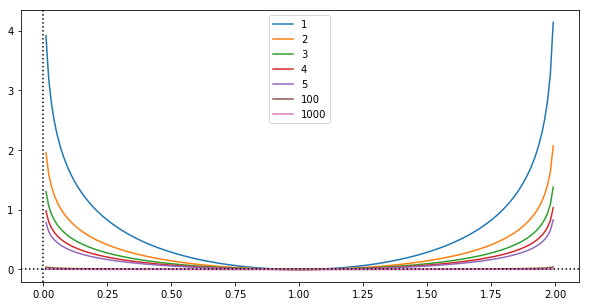

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
# def log_barrier_function(h_x):
#     assert h_x.all() <= 0
#     return np.log(-h_x)
#
def log_barrier_function(x):
    return - np.log(1-np.square(x-1))
    # return - (np.log(x-0.5) + np.log(2-x))

h1_x = np.linspace(-5, 6, 1000)
phi = log_barrier_function(h1_x)
ts = [1, 2, 3, 4, 5, 100, 1000]
for i, t in enumerate(ts): 
    y =  (1 / t) * phi 
    ax.plot(h1_x, y, label=t)
#     ax.set_ylim(-1, 1)  
plt.axhline(0, color='k', linestyle=':')
plt.axvline(0, color='k', linestyle=':')
plt.legend()

In [367]:
def plot(f_pos, f_neg, r, xpos_lim=[1, 2.2], ypos_lim=[1, 8], xneg_lim=[0, 1], yneg_lim=[-6,0]):
    #
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    for i, ax_col in enumerate(axes):
        for j, ax in enumerate(ax_col):
            if j == 0:
                ax.plot(r, f_pos, label='y')
            else:                
                ax.plot(r, f_neg, label='y')
            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.axvline(2, color='k', linestyle=':')
    plt.xlabel(r'$r(\theta)$')
    plt.ylabel(r'$r(\theta) \hat{A}_t$')
    #
    phi = log_barrier_function(r)
    ts = [0.5, 1, 5, 10, 100]
    for i, t in enumerate(ts): 
        y =  (1 / t) * phi 
        obj_pos = f_pos - y
        r_pos = r[np.logical_not(np.isnan(obj_pos))]
        obj_pos = obj_pos[np.logical_not(np.isnan(obj_pos))]
        obj_neg = f_neg - y
        r_neg = r[np.logical_not(np.isnan(obj_neg))]
        obj_neg = obj_neg[np.logical_not(np.isnan(obj_neg))]
        axes[0][0].plot(r_pos, obj_pos, label=t)
        axes[0][1].plot(r_neg, obj_neg, label=t)
        axes[0][0].plot(r[np.argmax(obj_pos)], np.max(obj_pos), "ro")
        axes[0][1].plot(r[np.argmax(obj_neg)], np.max(obj_neg), "ro")
        axes[1][0].plot(r_pos, obj_pos, label=t)
        axes[1][1].plot(r_neg, obj_neg, label=t)
        axes[1][0].plot(r[np.argmax(obj_pos)], np.max(obj_pos), "ro")
        axes[1][1].plot(r[np.argmax(obj_neg)], np.max(obj_neg), "ro")
        axes[1][0].set_xlim(xpos_lim)
        axes[1][0].set_ylim(ypos_lim)
        axes[1][1].set_xlim(xneg_lim)
        axes[1][1].set_ylim(yneg_lim)
    plt.legend()

/Users/yunlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/yunlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


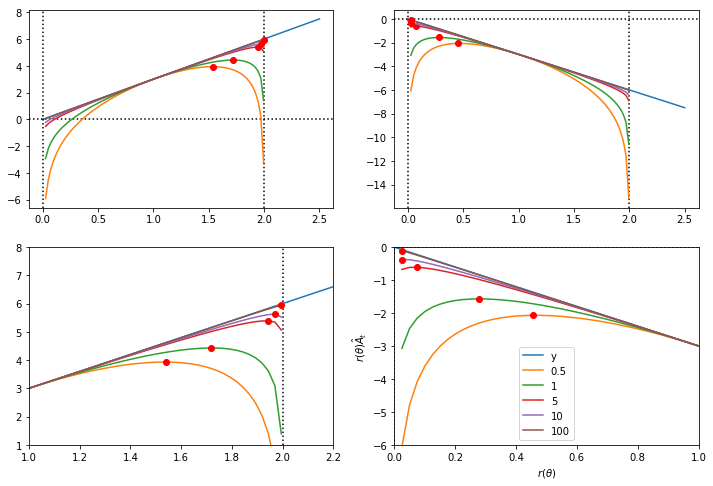

In [368]:
# ratio
r = np.linspace(0, 2.5, 100)
# positive reward and negitative reward
f_pos = r * 3
f_neg = r * (-3)
plot(f_pos, f_neg, r)

/Users/yunlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/yunlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


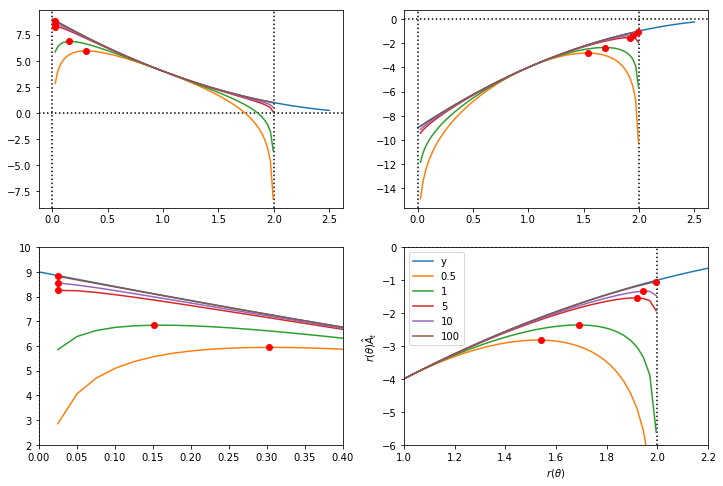

In [369]:
# ratio
f_pos = (r - 3)**2
f_neg = -(r - 3)**2
plot(f_pos, f_neg, r, xpos_lim=[0, 0.4], ypos_lim=[2, 10], xneg_lim=[1.0, 2.2], yneg_lim=[-6, 0])

/Users/yunlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/yunlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


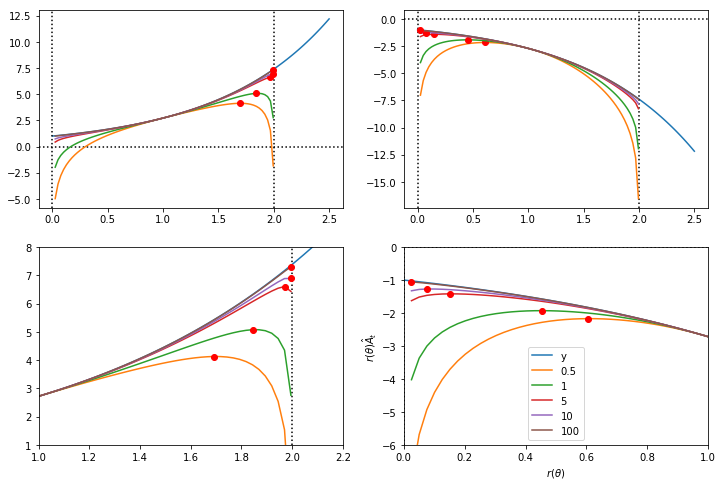

In [370]:
# ratio
f_pos = np.exp(r)
f_neg = -np.exp(r)
plot(f_pos, f_neg, r)

In [371]:
def alpha_fn(alpha=1.0):
    if alpha == 1.0:
        f = lambda x: x * np.log(x) - (x - 1)
    elif alpha == 0.0:
        f = lambda x: - np.log(x) + (x - 1)
    else:
        f = lambda x: ((np.power(x, alpha) - 1) - alpha * (x - 1)) / (alpha * (alpha - 1))
    return f

In [384]:
def plot_v2(alphas, f_pos, f_neg, r, xpos_lim=[1, 2.2], ypos_lim=[1, 8], xneg_lim=[0, 1], yneg_lim=[-6,0]):
    #
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    plt.xlabel(r'$r(\theta)$')
    plt.ylabel(r'$r(\theta) \hat{A}_t$')
    for i, alpha in enumerate(alphas):
        alpha_f = alpha_fn(alpha)
        obj_pos = f_pos - alpha_f(r)
        r_pos = r[np.logical_not(np.isnan(obj_pos))]
        obj_pos = obj_pos[np.logical_not(np.isnan(obj_pos))]
        obj_neg = f_neg - alpha_f(r)
        r_neg = r[np.logical_not(np.isnan(obj_neg))]
        obj_neg = obj_neg[np.logical_not(np.isnan(obj_neg))]
        axes[0][0].plot(r_pos, obj_pos, label=alpha)
        axes[0][1].plot(r_neg, obj_neg, label=alpha)
        axes[0][0].plot(r[np.argmax(obj_pos)], np.max(obj_pos), "ro")
        axes[0][1].plot(r[np.argmax(obj_neg)], np.max(obj_neg), "ro")
        axes[1][0].plot(r_pos, obj_pos, label=alpha)
        axes[1][1].plot(r_neg, obj_neg, label=alpha)
        axes[1][0].plot(r[np.argmax(obj_pos)], np.max(obj_pos), "ro")
        axes[1][1].plot(r[np.argmax(obj_neg)], np.max(obj_neg), "ro")
#         axes[0][0].set_xlim([0, np.max(r)+0.5])
#         axes[0][0].set_ylim([-3, 20])
#         axes[0][1].set_xlim([0, np.max(r)+0.5])
#         axes[0][1].set_ylim([-10, 0])
        axes[1][0].set_xlim(xpos_lim)
        axes[1][0].set_ylim(ypos_lim)
        axes[1][1].set_xlim(xneg_lim)
        axes[1][1].set_ylim(yneg_lim)
    for i, ax_col in enumerate(axes):
        for j, ax in enumerate(ax_col):
            if j == 0:
                ax.plot(r, f_pos, label='y')
            else:                
                ax.plot(r, f_neg, label='y')
            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.axvline(2, color='k', linestyle=':')
            ax.legend()

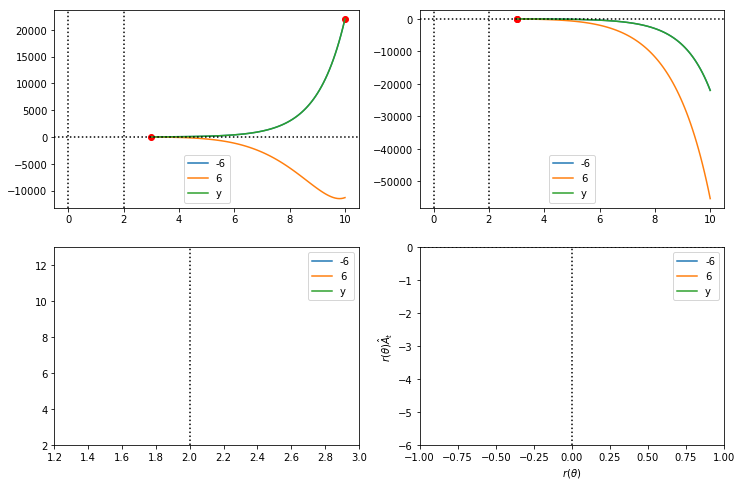

In [393]:
r = np.linspace(3, 10, 100)
alphas = [-6, 6]
f_pos = np.exp(r)
f_neg = -np.exp(r)
plot_v2(alphas, f_pos, f_neg, r, xpos_lim=[1.2, 3], ypos_lim=[2, 13], 
        xneg_lim=[-1.0, 1.0], yneg_lim=[-6, 0])

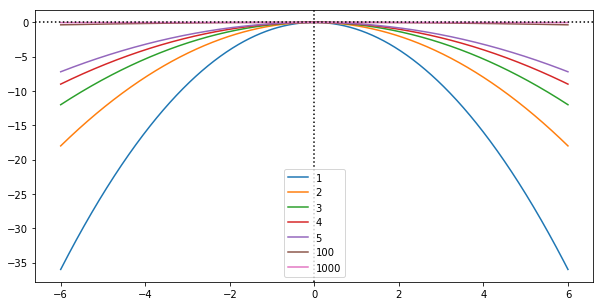

In [374]:
fig, ax = plt.subplots(figsize=(10,5))
# def log_barrier_function(h_x):
#     assert h_x.all() <= 0
#     return np.log(-h_x)
#
def log_barrier_function(x):
    return - np.square(x)
    # return - (np.log(x-0.5) + np.log(2-x))

h1_x = np.linspace(-6, 6, 1000)
phi = log_barrier_function(h1_x)
ts = [1, 2, 3, 4, 5, 100, 1000]
for i, t in enumerate(ts): 
    y =  (1 / t) * phi 
    ax.plot(h1_x, y, label=t)
#     ax.set_ylim(-1, 1)  
plt.axhline(0, color='k', linestyle=':')
plt.axvline(0, color='k', linestyle=':')
plt.legend()

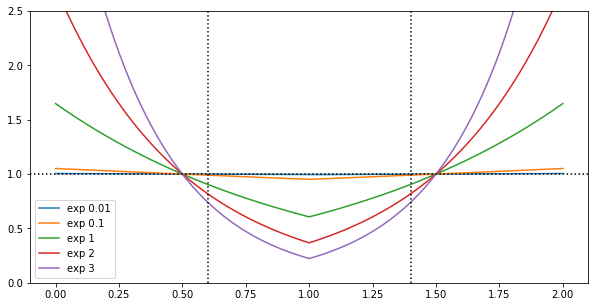

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
kl_target = 0.1

def exp_barrier_function(x, t):
    return np.exp(t * (x - kl_target))

def exp_barrier_fun(x, t):
    return np.exp( - t * (0.5 - np.abs(x-1) ))

meankl = np.linspace(0, 2.0, 1000)
ts = [0.01, 0.1, 1, 2, 3,]
for i, t in enumerate(ts): 
#     phi = exp_barrier_function(meankl, t)
    phi = exp_barrier_fun(meankl, t)
    ax.plot(meankl, phi, label="exp {}".format(t))
#     ax.plot(h1_x, ts[i] * meankl, label="linear {}".format(t))
    ax.set_ylim(0, 2.5)
plt.axhline(1., color='k', linestyle=':')
plt.axvline(1-0.4, color='k', linestyle=':')
plt.axvline(1+0.4, color='k', linestyle=':')
plt.legend()

In [8]:
def plot(f_pos, r, xpos_lim=[1, 2.2], ypos_lim=[1, 8], xneg_lim=[0, 1], yneg_lim=[-6,0]):
    #
    fig, axes = plt.subplots(1, 2, figsize=(12,8))
    for i, ax_col in enumerate(axes):
        for j, ax in enumerate(ax_col):
            if j == 0:
                ax.plot(r, f_pos, label='y')
            else:                
                ax.plot(r, f_neg, label='y')
            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.axvline(2, color='k', linestyle=':')
    plt.xlabel(r'$r(\theta)$')
    plt.ylabel(r'$r(\theta) \hat{A}_t$')
    #
    ts = [0.5, 1, 10]
    for i, t in enumerate(ts): 
        y = exp_barrier_function(h1_x, t)
        obj_pos = f_pos - y
        r_pos = r[np.logical_not(np.isnan(obj_pos))]
        obj_pos = obj_pos[np.logical_not(np.isnan(obj_pos))]
        obj_neg = f_neg - y
        r_neg = r[np.logical_not(np.isnan(obj_neg))]
        obj_neg = obj_neg[np.logical_not(np.isnan(obj_neg))]
        axes[0][0].plot(r_pos, obj_pos, label=t)
        axes[0][1].plot(r_neg, obj_neg, label=t)
        axes[0][0].plot(r[np.argmax(obj_pos)], np.max(obj_pos), "ro")
        axes[0][1].plot(r[np.argmax(obj_neg)], np.max(obj_neg), "ro")
        axes[1][0].plot(r_pos, obj_pos, label=t)
        axes[1][1].plot(r_neg, obj_neg, label=t)
        axes[1][0].plot(r[np.argmax(obj_pos)], np.max(obj_pos), "ro")
        axes[1][1].plot(r[np.argmax(obj_neg)], np.max(obj_neg), "ro")
        axes[1][0].set_xlim(xpos_lim)
        axes[1][0].set_ylim(ypos_lim)
        axes[1][1].set_xlim(xneg_lim)
        axes[1][1].set_ylim(yneg_lim)
    plt.legend()

TypeError: 'AxesSubplot' object is not iterable

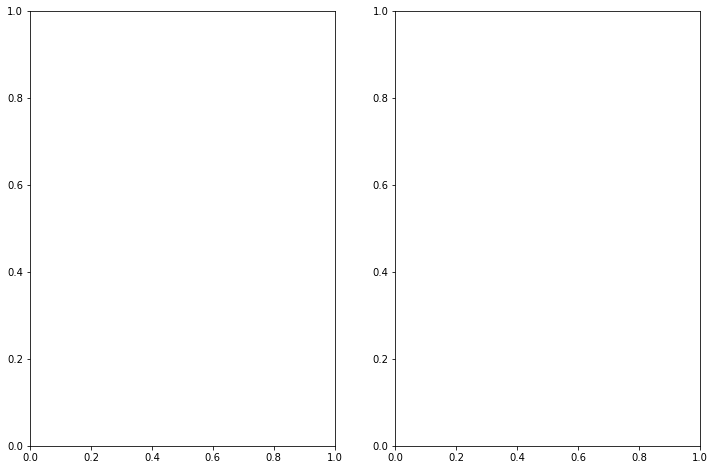

In [9]:
# ratio
r = np.linspace(-1, 3, 1000)
# positive reward and negitative reward
f_pos = r * 3
plot(f_pos, r)